In [140]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
# Load the data
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [86]:
# Flatten images into single vectors
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

In [87]:
# Standardize dataset by dividing every row by 255
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

In [90]:
# Build sigmoid helper function

def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    return s

In [97]:
# Initialize w as a vector of zeros
def initialize_zero(size):
    w = np.zeros(size).reshape(size, 1)
    b = 0.0
    return w, b

In [102]:
# compute cost function and gradient
def propagate(w, b, x, y):
    m = x.shape[1]
    
    # forward propagation
    A = sigmoid(np.dot(w.T, x) + b)
    cost = - (1/m) * np.sum(y * np.log(A) + (1-y) * np.log(1-A))
    
    # backward propagation
    dw = (1/m) * np.dot(x, (A-y).T)
    db = (1/m) * np.sum(A - y)
    
    cost = np.squeeze(np.array(cost))
    
    gradients = {"dw": dw,
                "db": db}
    
    return gradients, cost

In [111]:
# optimization function (minimize cost function)
def optimize(w, b, x, y, iterations=100, learning_rate=0.009, print_cost = False):
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    costs = []
    
    for i in range(iterations):
        gradients, cost = propagate(w, b, x, y)
        
        # use gradients to find derivatives
        dw = gradients["dw"]
        db = gradients["db"]

        # update parameters
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # keep track of costs
        if i % 100 == 0:
            costs.append(cost)
            
            # after 100 iterations, print
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    parameters = {"w": w,
                 "b": b}
    gradients = {"dw": dw,
                "db": db}
    return parameters, gradients, costs

In [114]:
def predict(w, b, x):
    m = x.shape[1]
    prediction = np.zeros((1,m))
    w = w.reshape(x.shape[0], 1)
    
    # A predicts cat vs non-cat
    A = sigmoid(np.dot(w.T, x) + b)
    
    for i in range(A.shape[1]):
        if A[0, i] > 0.5:
            prediction[0, i] = 1
        else:
            prediction[0, i] = 0
    return prediction

In [116]:
# merge functions into a complete model
def model (X_train, Y_train, X_test, Y_test, iterations=2000, learning_rate=0.5, print_cost=False):
    # initialize params with zeros
    w, b = initialize_zero(X_train.shape[0])
    
    # gradient descent
    parameters, gradient, costs = optimize(w, b, X_train, Y_train, iterations, learning_rate, print_cost)
    
    # use dictionary to find parameters
    w = parameters["w"]
    b = parameters["b"]
    
    # predict the test and training datasets
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    result = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "iterations": iterations}
    return result

In [144]:
# train model
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, iterations=2000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


Prediction is a "cat" picture.


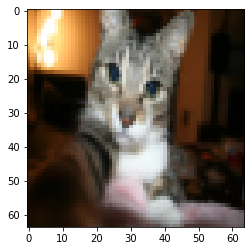

In [173]:
# Check predictions from test set
index = 25
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
print ("Prediction is a \"" + classes[int(logistic_regression_model['Y_prediction_test'][0,index])].decode("utf-8") +  "\" picture.")

Prediction is a "cat" picture.


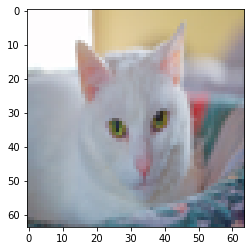

In [151]:
# Test your own image
my_image = "cat4.jpeg"   

# preprocess the image
location = "Images/" + my_image
image = np.array(Image.open(location).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T
predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)

print("Prediction is a \"" + classes[int(np.squeeze(predicted_image)),].decode("utf-8") +  "\" picture.")